In [1]:
# ------------------------------ Facial Expression Recognition -----------------------------------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# ------------------------------ Data preparation -----------------------------------

In [4]:
data = pd.read_csv("data/train.csv")
print(data.shape)

(35887, 3)


In [5]:
val_orig, test_orig, train_orig = data.groupby('Usage')
print('val:',   val_orig[0])
print('test:',  test_orig[0])
print('train:', train_orig[0])
print(val_orig[1].head(2))

val: PrivateTest
test: PublicTest
train: Training
       emotion                                             pixels        Usage
32298        0  170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...  PrivateTest
32299        5  7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...  PrivateTest


In [6]:
val_data_orig, test_data_orig, train_data_orig = val_orig[1], test_orig[1], train_orig[1]
print('val_data_orig.shape:  ', val_data_orig.shape)
print('test_data_orig.shape: ',  test_data_orig.shape)
print('train_data_orig.shape:', train_data_orig.shape)
#print('val_data_orig:  ', val_data_orig)

val_data_orig.shape:   (3589, 3)
test_data_orig.shape:  (3589, 3)
train_data_orig.shape: (28709, 3)


In [7]:
def prepare(data):
    images = np.array([np.fromstring(image, np.uint8, sep=' ') for image in data['pixels']])
    images = images.reshape(images.shape[0], 48, 48)
    images = np.stack((images,) * 3, axis=-1)
    labels = np.array(data['emotion'])
    return images, labels.reshape(len(labels), 1)

val_data_orig_X,   val_data_orig_Y   = prepare(val_data_orig)
test_data_orig_X,  test_data_orig_Y  = prepare(test_data_orig)
train_data_orig_X, train_data_orig_Y = prepare(train_data_orig)

print('val_data_orig_X.shape:  ', val_data_orig_X.shape)
print('val_data_orig_Y.shape:  ', val_data_orig_Y.shape)
print('test_data_orig_X.shape: ', test_data_orig_X.shape)
print('test_data_orig_Y.shape: ', test_data_orig_Y.shape)
print('train_data_orig_X.shape:', train_data_orig_X.shape)
print('train_data_orig_Y.shape:', train_data_orig_Y.shape)
#print('train_data_orig_Y:', train_data_orig_Y)

val_data_orig_X.shape:   (3589, 48, 48, 3)
val_data_orig_Y.shape:   (3589, 1)
test_data_orig_X.shape:  (3589, 48, 48, 3)
test_data_orig_Y.shape:  (3589, 1)
train_data_orig_X.shape: (28709, 48, 48, 3)
train_data_orig_Y.shape: (28709, 1)


In [8]:
train_data_Y = np.eye(7)[train_data_orig_Y.reshape(-1)]
train_data_Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [9]:
val_data_Y  = np.eye(7)[val_data_orig_Y.reshape(-1)]
test_data_Y = np.eye(7)[test_data_orig_Y.reshape(-1)]

In [10]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

train_data_orig_Y: 3
emotion: Happy


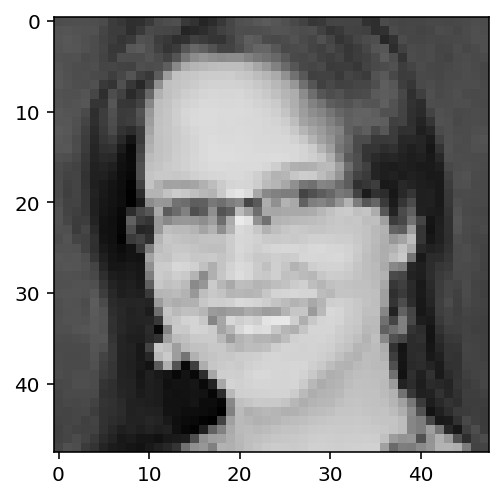

In [11]:
index = 7
plt.imshow(train_data_orig_X[index])
print('train_data_orig_Y:', train_data_orig_Y[index][0])
print('emotion:', emotions[np.where(train_data_Y[index, :] == 1)[0][0]])

In [12]:
# ------------------------------ Training -----------------------------------

In [13]:
import tensorflow as tf
from tensorflow.python.framework import ops
import math

In [14]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    X = tf.placeholder(tf.float32, shape=[None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, shape=[None, n_y])
    
    return X, Y
X, Y = create_placeholders(48, 48, 3, 7)
print('X:', X)
print('Y:', Y)

X: Tensor("Placeholder:0", shape=(?, 48, 48, 3), dtype=float32)
Y: Tensor("Placeholder_1:0", shape=(?, 7), dtype=float32)


In [15]:
def initialize_parameters():
    W1 = tf.get_variable('W1', [4, 4, 3, 8], initializer=tf.contrib.layers.xavier_initializer())
    W2 = tf.get_variable('W2', [2, 2, 8, 16], initializer=tf.contrib.layers.xavier_initializer())
    
    parameters = {'W1' : W1,
                  'W2' : W2}
    
    return parameters

In [16]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()[1, 1, 1]))
    print("W2 = " + str(parameters["W2"].eval()[1, 1, 1]))

W0817 16:50:59.998836  2760 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W1 = [ 0.0529992   0.1607701   0.07444017 -0.05942309  0.00049083 -0.17644075
  0.13849418 -0.01636007]
W2 = [ 0.15658838  0.24636334 -0.02761233  0.11803091 -0.18279207 -0.2021907
  0.20465982  0.24637604 -0.18643296 -0.19654912  0.1035108  -0.05625325
 -0.01393491  0.04136705  0.14183152 -0.02456224]


In [17]:
def forward_propagation(X, parameters):  
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    Z1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME')
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')

    Z2 = tf.nn.conv2d(P1, W2, strides=[1,1,1,1], padding='SAME')
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

    F = tf.contrib.layers.flatten(P2)
    Z3 = tf.contrib.layers.fully_connected(F,   120, activation_fn=tf.nn.relu)
    Z4 = tf.contrib.layers.fully_connected(Z3,   64, activation_fn=tf.nn.relu)
    Z5 = tf.contrib.layers.fully_connected(Z4,    7,   activation_fn=None)

    return Z5

In [18]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(48, 48, 3, 7)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2, 48, 48, 3), Y: np.random.randn(2, 7)})
    print("Z = " + str(a))

W0817 16:51:00.356588  2760 deprecation.py:323] From C:\Users\elena\.conda\envs\pysyft\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py:1634: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.


Z3 = [[ 0.1141557   0.136746    0.46454442  1.2570102  -0.3939319   0.0833112
   0.9359363 ]
 [ 0.04332627  0.18007362  0.46326113  1.1020421  -0.30896562  0.15670735
   0.50961244]]


In [19]:
def compute_cost(Z, Y):

    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits = Z, labels = Y) )
    
    return cost

In [20]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(48, 48, 3, 7)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(4, 48, 48, 3), Y: np.random.randn(4, 7)})
    print("cost = " + str(a))

W0817 16:51:02.263817  2760 deprecation.py:323] From <ipython-input-19-3d6e47fcecb2>:13: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



cost = 0.7470021


In [21]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [22]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0005,
          num_epochs = 30, minibatch_size = 50, print_cost = True):
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    (m, n_H0, n_W0, n_C0) = X_train.shape          
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    accurancies = []

    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)

    parameters = initialize_parameters()

    Z3 = forward_propagation(X, parameters)

    cost = compute_cost(Z3, Y)

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
    
 
    with tf.Session() as sess:
            # Run the initialization
            sess.run(init)

            # Do the training loop
            for epoch in range(num_epochs):

                minibatch_cost = 0.
                num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
                minibatches = random_mini_batches(X_train, Y_train, minibatch_size)

                for minibatch in minibatches:

                    # Select a minibatch
                    (minibatch_X, minibatch_Y) = minibatch

                    _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

                    minibatch_cost += temp_cost / num_minibatches


                # Print the cost every epoch
                if print_cost == True and epoch % 5 == 0:
                    print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            
                if print_cost == True and epoch % 1 == 0:
                    costs.append(minibatch_cost)
                    # Calculate the correct predictions
                    predict_op = tf.argmax(Z3, 1)
                    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

                    # Calculate accuracy on the test set
                    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
                    test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
                    accurancies.append(test_accuracy)


            # plot the cost
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()
            
            # plot the accurancies
            plt.plot(np.squeeze(accurancies))
            plt.ylabel('accurancy')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()
            
            # Calculate the correct predictions
            predict_op = tf.argmax(Z3, 1)
            correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

            # Calculate accuracy on the test set
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            print(accuracy)
            train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
            test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
            print("Train Accuracy:", train_accuracy)
            print("Test Accuracy:", test_accuracy)

            return train_accuracy, test_accuracy, parameters

Cost after epoch 0: 1.712564
Cost after epoch 5: 1.348084
Cost after epoch 10: 1.213757
Cost after epoch 15: 1.080798
Cost after epoch 20: 0.948688
Cost after epoch 25: 0.825732


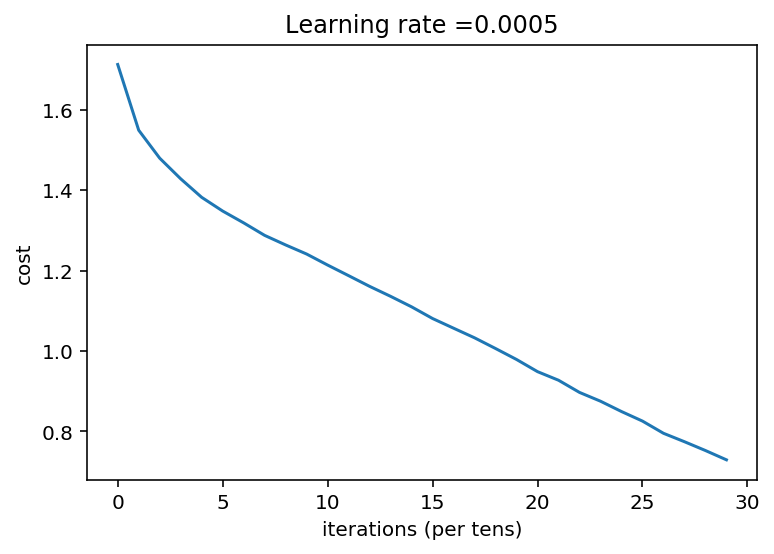

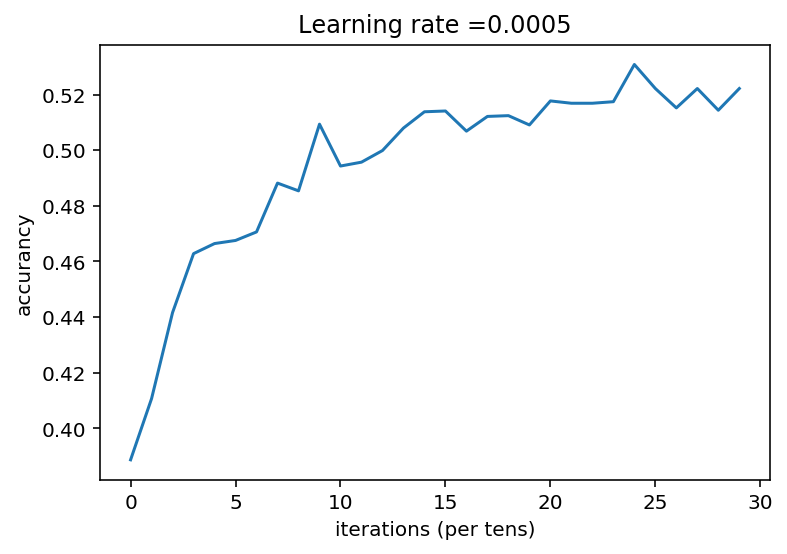

Tensor("Mean_31:0", shape=(), dtype=float32)
Train Accuracy: 0.7621652
Test Accuracy: 0.522151


In [23]:
_, _, parameters = model(train_data_orig_X/255, train_data_Y, test_data_orig_X/255, test_data_Y)